In [1]:
import dataset

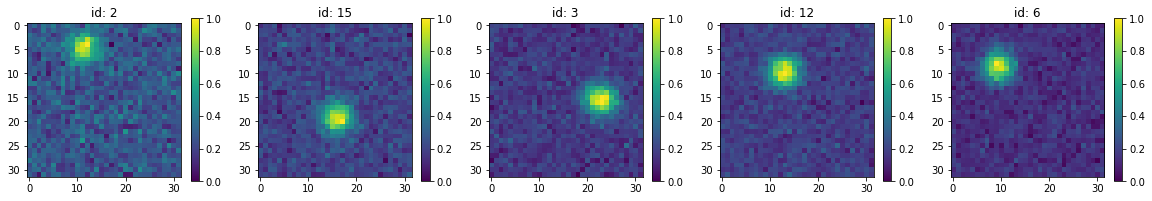

In [2]:
a = dataset.Gaussian2DPSFDataset(length=16, )
dataset.inspect_psfs(a)

[[ 0.         0.         0.        ...  0.         0.         0.       ]
 [ 0.0078125  0.0078125  0.0078125 ...  0.0078125  0.0078125  0.0078125]
 [ 0.015625   0.015625   0.015625  ...  0.015625   0.015625   0.015625 ]
 ...
 [-0.0234375 -0.0234375 -0.0234375 ... -0.0234375 -0.0234375 -0.0234375]
 [-0.015625  -0.015625  -0.015625  ... -0.015625  -0.015625  -0.015625 ]
 [-0.0078125 -0.0078125 -0.0078125 ... -0.0078125 -0.0078125 -0.0078125]]


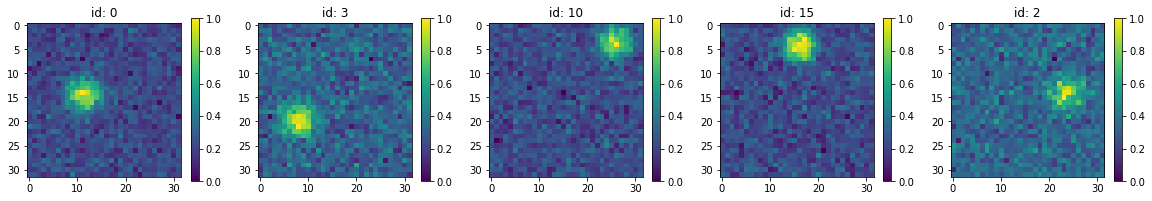

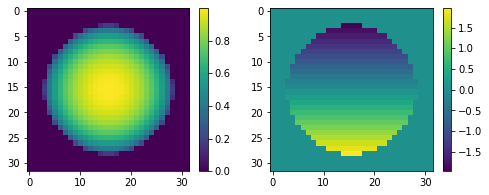

In [5]:
a = dataset.FourierOptics2DPSFDataset(length=16, psf_zerns={1:2}) #psf_zerns={4:0, 5:0.5, 7:1})
dataset.inspect_psfs(a)
print(a.kx)